# **Regressão**

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/fixacao/batteryRUL.csv' -O 'battery.csv'

## Bibliotecas

In [ ]:
# Manipulação:
import numpy as np
import pandas as pd

# Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem:
from sklearn.model_selection import train_test_split  # treino/teste
from sklearn.preprocessing import StandardScaler # normalização
from sklearn.linear_model import LinearRegression # treino do modelo Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # métricas de validação

## Coleta dos dados

In [ ]:
bateria = pd.read_csv('battery.csv')
bateria.head()

,cycle_index,discharge_time_s,decrement,max_voltage_discharge,min_voltage_charge,time_4v,time_constant_current_s,charging_time_s,remaining_useful_life
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


## Análise Exploratória de Dados (EDA)

In [ ]:
# tamanho do dataset:
bateria.shape

(15064, 9)

In [ ]:
# tipo de dados:
bateria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_index              15064 non-null  float64
 1   discharge_time_s         15064 non-null  float64
 2   decrement                15064 non-null  float64
 3   max_voltage_discharge    15064 non-null  float64
 4   min_voltage_charge       15064 non-null  float64
 5   time_4v                  15064 non-null  float64
 6   time_constant_current_s  15064 non-null  float64
 7   charging_time_s          15064 non-null  float64
 8   remaining_useful_life    15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
bateria.isna().sum() / len(bateria) * 100

cycle_index                0.0
discharge_time_s           0.0
decrement                  0.0
max_voltage_discharge      0.0
min_voltage_charge         0.0
time_4v                    0.0
time_constant_current_s    0.0
charging_time_s            0.0
remaining_useful_life      0.0
dtype: float64

In [ ]:
# estatísticas descritivas:
bateria.describe().T

,count,mean,std,min,25%,50%,75%,max
cycle_index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
discharge_time_s,15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
decrement,15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
max_voltage_discharge,15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
min_voltage_charge,15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
time_4v,15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
time_constant_current_s,15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
charging_time_s,15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
remaining_useful_life,15064.0,554.194172,322.434514,0.000,277.000000,551.000000,839.0000,1133.000


In [ ]:
#sns.pairplot(bateria)

In [ ]:
bateria.columns

Index(['cycle_index', 'discharge_time_s', 'decrement', 'max_voltage_discharge',
       'min_voltage_charge', 'time_4v', 'time_constant_current_s',
       'charging_time_s', 'remaining_useful_life'],
      dtype='object')

In [ ]:
# separando as colunas de interesse
colunas = [
    'cycle_index',
    'discharge_time_s',
    'max_voltage_discharge',
    'min_voltage_charge',
    'charging_time_s',
    'remaining_useful_life'
]

# dados que serão utilizados:
bateria = bateria[colunas]
bateria

,cycle_index,discharge_time_s,max_voltage_discharge,min_voltage_charge,charging_time_s,remaining_useful_life
0,1.0,2595.30,3.670,3.211,10777.82,1112
1,2.0,7408.64,4.246,3.220,10500.35,1111
2,3.0,7393.76,4.249,3.224,10420.38,1110
3,4.0,7385.50,4.250,3.225,10322.81,1109
4,6.0,65022.75,4.290,3.398,56699.65,1107
...,...,...,...,...,...,...
15059,1108.0,770.44,3.773,3.742,6678.88,4
15060,1109.0,771.12,3.773,3.744,6670.38,3
15061,1110.0,769.12,3.773,3.742,6637.12,2
15062,1111.0,773.88,3.763,3.839,7660.62,1


<Axes: >

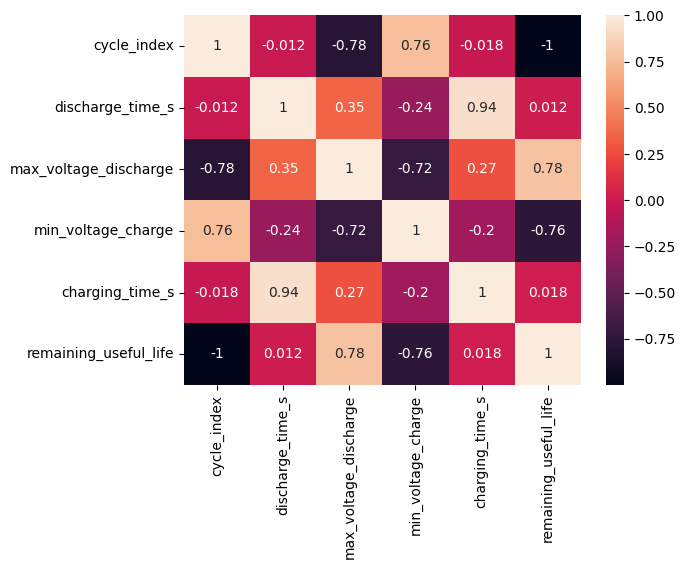

In [ ]:
# correlaçãoes:
correlacoes = bateria.corr()
sns.heatmap(correlacoes, annot=True)

## Modelagem

In [ ]:
# Variáveis preditoras e variável resposta:
X = bateria.drop('remaining_useful_life', axis=1)
y = bateria[['remaining_useful_life']]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape
X_test.shape

(3013, 5)

In [ ]:
# normalizador:
scaler = StandardScaler()

# Normalização treino:
X_train['cycle_index'] = scaler.fit_transform(X_train[['cycle_index']])
X_train['discharge_time_s'] = scaler.fit_transform(X_train[['discharge_time_s']])
X_train['max_voltage_discharge'] = scaler.fit_transform(X_train[['max_voltage_discharge']])
X_train['min_voltage_charge'] = scaler.fit_transform(X_train[['min_voltage_charge']])
X_train['charging_time_s'] = scaler.fit_transform(X_train[['charging_time_s']])

# Normalização teste:
X_test['cycle_index'] = scaler.fit_transform(X_test[['cycle_index']])
X_test['discharge_time_s'] = scaler.fit_transform(X_test[['discharge_time_s']])
X_test['max_voltage_discharge'] = scaler.fit_transform(X_test[['max_voltage_discharge']])
X_test['min_voltage_charge'] = scaler.fit_transform(X_test[['min_voltage_charge']])
X_test['charging_time_s'] = scaler.fit_transform(X_test[['charging_time_s']])

### **Regressão Linear Múltipla**

In [ ]:
# treino do modelo:
modelo = LinearRegression()
modelo = modelo.fit(X_train, y_train)
modelo.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['cycle_index', 'discharge_time_s', 'max_voltage_discharge',
        'min_voltage_charge', 'charging_time_s'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([[-3.22287873e+02, -4.03623128e-02,  1.59694572e-01,
         -7.51587058e-02,  1.16342765e-02]]),
 'rank_': 5,
 'singular_': array([182.89202855, 144.5158771 ,  56.94146064,  45.19648069,
         25.21141319]),
 'intercept_': array([555.75529002])}

\begin{equation}
   RUL = 555.8 - 320*X_1 -0.04*X_2 + 0.16* X_3
         - 0.075*X_4 +  0.012*X_5
\end{equation}

In [ ]:
X_test.head(1)

,cycle_index,discharge_time_s,max_voltage_discharge,min_voltage_charge,charging_time_s
8692,-1.545814,-0.077374,1.022034,-1.451602,-0.047843


In [ ]:
# previsões:
predicoes = modelo.predict(X_test)
predicoes[0]

array([1054.22718057])

In [ ]:
y_test.head(1)

,remaining_useful_life
8692,1043


In [ ]:
# validação:
pred_treino = modelo.predict(X_train)
pred_teste = modelo.predict(X_test)

rmse_treino = np.sqrt(  mean_squared_error(y_train, pred_treino) )
rmse_teste = np.sqrt( mean_squared_error(y_test, pred_teste))

r2_treino = r2_score(y_train, pred_treino)
r2_teste = r2_score(y_test, pred_teste)

print('RMSE')
print(rmse_treino)
print(rmse_teste)

print('R²')
print(r2_treino)
print(r2_teste)

RMSE
7.053733731183973
10.764345743788347
R²
0.9995217588874551
0.9988813973489715


In [ ]:
X_train = X_train['max_voltage_discharge']
X_test = X_test['max_voltage_discharge']
X_train

10930    0.428716
12487   -0.731758
2924    -0.419323
11620   -0.620174
4122    -0.865659
           ...   
5191    -1.111144
13418    0.105122
5390    -2.885330
860     -0.564382
7270    -0.999560
Name: max_voltage_discharge, Length: 12051, dtype: float64

### **Regressão Linear Simples**

In [ ]:
battery = bateria.copy()
battery = battery[['max_voltage_discharge', 'remaining_useful_life']]
battery

x1= battery[['max_voltage_discharge']]
y1=battery[['remaining_useful_life']]

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [ ]:
modelo_LS = LinearRegression()
modelo_LS = modelo_LS.fit(X_treino, y_treino)
modelo_LS.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['max_voltage_discharge'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[2846.72120176]]),
 'rank_': 1,
 'singular_': array([9.83805933]),
 'intercept_': array([-10570.8797655])}

In [ ]:
pred_treino_LS = modelo_LS.predict(X_treino)
pred_teste_LS = modelo_LS.predict(X_teste)

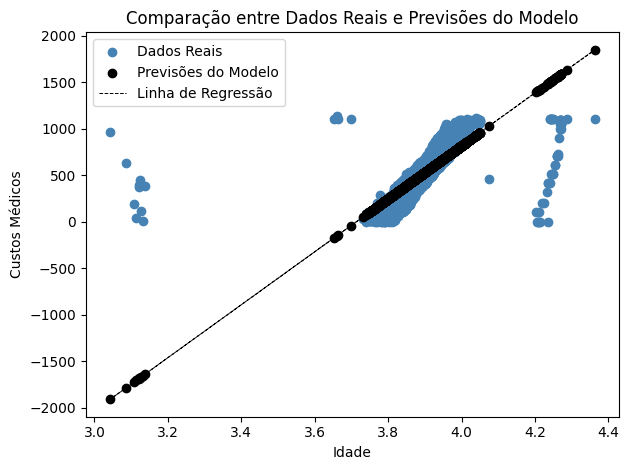

In [ ]:
# Plotar os pontos de dados reais
plt.scatter(X_teste, y_teste, color='steelblue', label='Dados Reais')

# Plotar os valores previstos pelo modelo
plt.scatter(X_teste, pred_teste_LS, color='black', label='Previsões do Modelo')

# Plotar a linha de regressão
plt.plot(X_teste, pred_teste_LS, color='black', linestyle='dashed', lw=0.7, label='Linha de Regressão')

# Configurações do gráfico
plt.title('Comparação entre Dados Reais e Previsões do Modelo')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.legend()
plt.tight_layout()

In [ ]:
r2_treino_LS = r2_score(y_treino, pred_treino_LS)
r2_teste_LS = r2_score(y_teste, pred_teste_LS)

print('R²')
print(r2_treino_LS)
print(r2_teste_LS)

R²
0.6255966931485692
0.5589401092604902
